## Imports

In [22]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

from sklearn.model_selection import StratifiedKFold

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Reading Data

In [2]:
df = pd.read_csv("../../../data/stratified_valid.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   car_id      2337 non-null   object 
 1   target_reg  2337 non-null   float64
 2   num_fold    0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 54.9+ KB


In [3]:
df

,car_id,target_reg,num_fold
0,y13744087j,9492.96,NaN
1,O41613818T,2656.23,NaN
2,d-2109686j,1526.11,NaN
3,u29695600e,1338.00,NaN
4,N-8915870N,825.72,NaN
...,...,...,...
2332,j21246192N,547.30,NaN
2333,h-1554287F,26414.19,NaN
2334,A15262612g,2677.95,NaN
2335,W-2514493U,2213.63,NaN


## Processing

In [23]:
n = 10
df["bin"] = pd.cut(df["target_reg"], n, labels=range(10))
kf = StratifiedKFold(n_splits=n, random_state=42, shuffle=True)

In [32]:
for i, (train_index, test_index) in enumerate(kf.split(X=df["car_id"], y=df["bin"])):
    df.loc[test_index, "num_fold"] = int(i)

c:\Users\ryblo\Documents\projects\Introduction-to-Competitive-Data-Analysis\venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


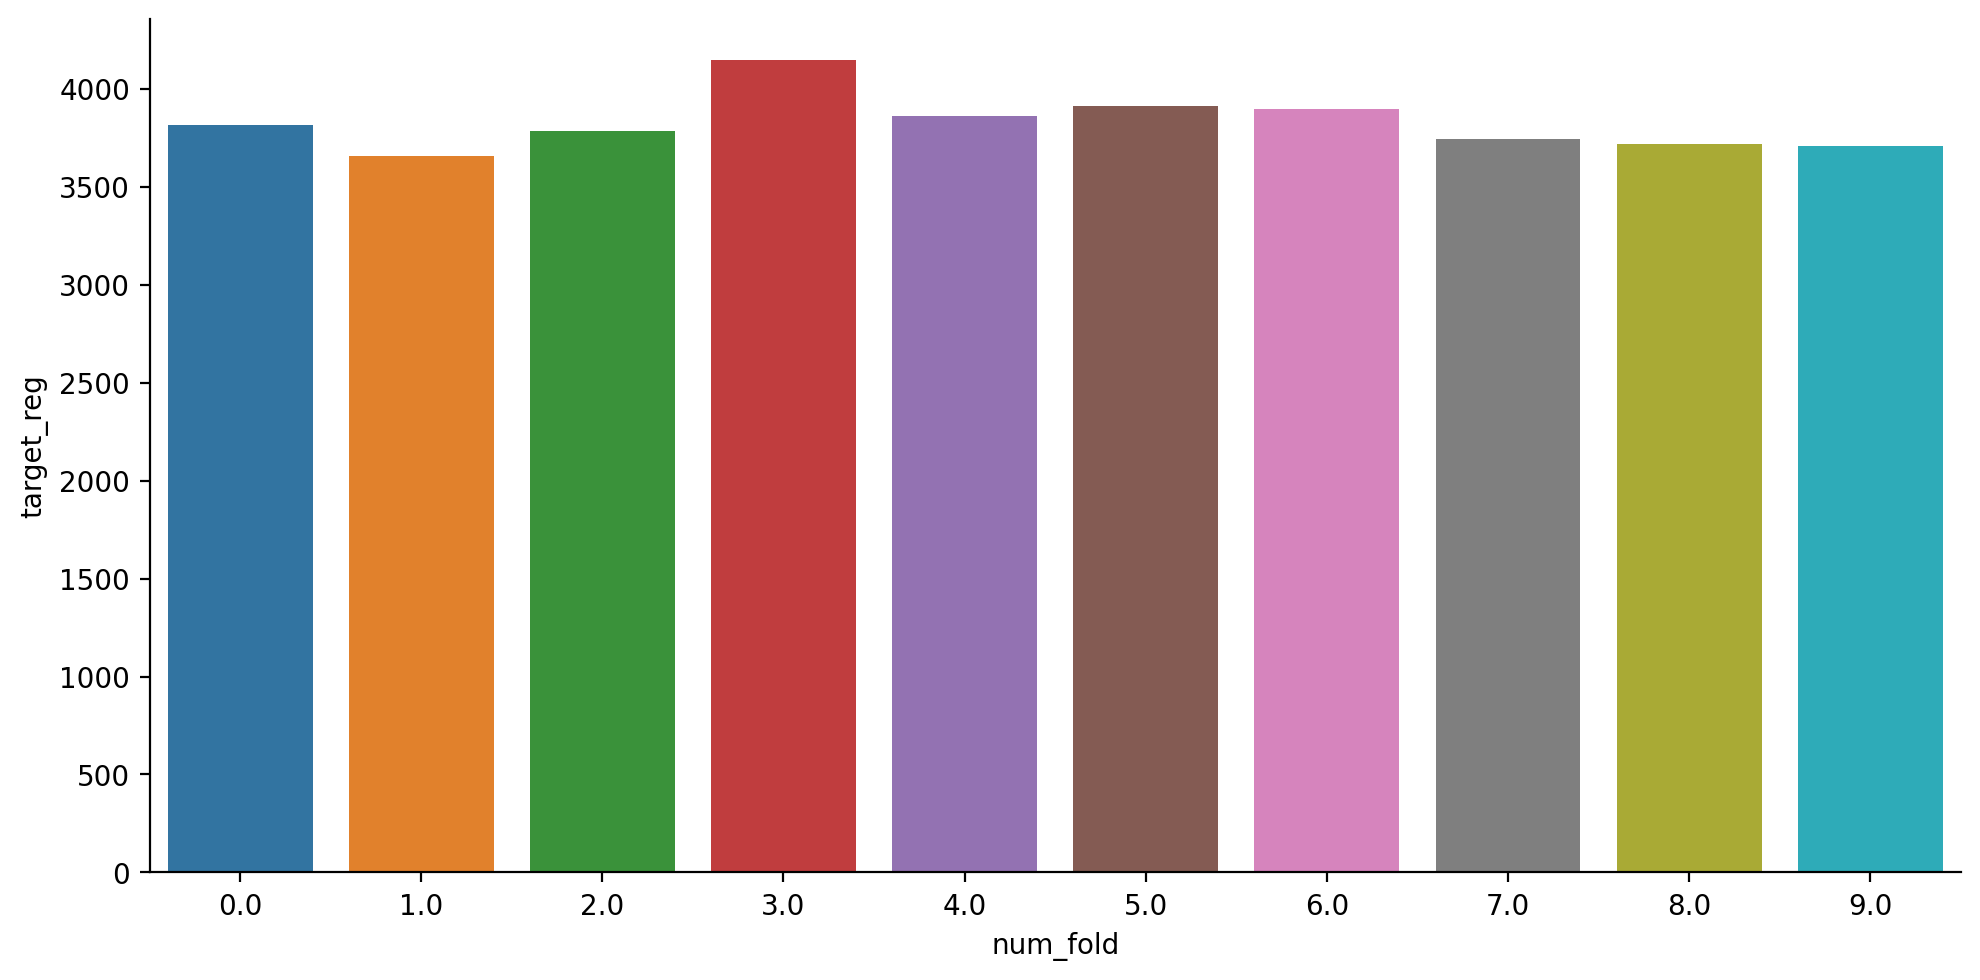

In [34]:
tmp = df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')
sns.catplot(data = tmp, x = 'num_fold', y = 'target_reg', aspect=2, kind="bar");

In [35]:
df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')['target_reg'].std()

141.09944793905203

In [36]:
df.drop("bin", axis=1).to_csv("sub.csv", index=False)